<a href="https://colab.research.google.com/github/Leo-Vincenzi/PUC-MVV_1/blob/main/MVP_1_Leo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pontifícia Universidade Católica - PUC-Rio
## Curso de Análise de Dados e Boas Práticas
### Aluno: Leonardo Braga De Vincenzi
### MVP Sprint 1 (Dez/2023)


## 1. Definição do Problema

O dataset usado neste projeto será o **Customer Shopping Trends Dataset**, que oferece informações a respeito do comportamento do consumidor e os seus padrões de compra.
Este conjunto de dados captura uma ampla gama de atributos do cliente, incluindo idade, sexo, histórico de compras, métodos de pagamento, frequência de compras e avaliações de feedback.
Além disso, são incluídos dados sobre o tipo de itens adquiridos, épocas de compras preferidas e interações com ofertas promocionais.
Compreender as preferências e tendências do cliente é fundamental para que as empresas entenderem melhor o seu nicho de mercado, oferecendo novos produtos, desenvolvendo estratégias de marketing eficazes e melhorando a experiência geral do cliente.
A análise desses dados pode auxiliar as empresas ligadas ao comércio varejista na tomada de decisões gerenciais mais rápidas e precisas, otimizando a ofertas de produtos, aumentando a satisfação do cliente, e alinhando suas estratégias de vendas com as preferências dos seus clientes.
Com uma coleção de 3.900 registros, este dataset foi criado com objetivos acadêmicos pelo ChatGPT.
Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset


**Informações sobre os atributos:**
01. **ID-do-Cliente** - Identificador exclusivo do cliente (chave primária)
Customer ID(1,...,3900)
02. **Idade** - Idade do Cliente
Age(18,...,70)
03. **Genero** - Gênero do Cliente (M/F)
Gender(Male,Female)
04. **Item-comprado** - Item comprado pelo cliente
Item Purchased(Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,Jacket,Jeans,Jewelry,Pants,Sandals,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt)
05. **Categoria** - Categoria do bem adquirido
Category(Acessories,Clothing,Outerware,Footwear)
06. **Valor-compra** - Valor de compra
Purchase Amount(USD)(20,...,100)
07. **Local** - Local onde a compra foi realizada
Location(Alabama,Alasca,Arkansas,Arizona,Califórnia,Cansas,Carolina do Norte, Carolina do Sul,Colorado,Conecticute,Dacota do Norte,Dacota do Sul,Delaware, Flórida,Geórgia,Havaí,Idaho,Ilha de Rodes,Ilinóis,Indiana,Iowa,Kentucky,Luisiana,Maine,Marilândia,Massachussets,Michigan,Minesota,Mississípi,Missúri,Montana,Nebrasca,Nevada,Nova Hampshire,Nova Jérsei,Nova Iorque Novo México, Oklahoma,Ohio,Óregon,Pensilvânia,Tenessi,Texas,Utah,Vermonte,Virgínia,Virgínia Ocidental,Washington,Wisconsin,Wyoming)
08. **Tamanho** - Tamanho do item adquirido
Size(L,M,S,XL)
09. **Cor** - Cor do item adquirido
Color(Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,Lavender,Magenta,Maroon,Olive,Orange,Peach,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow)
10. **Temporada** - Estação na qual a compra foi feita (Verão/Inverno/Outono/Primavera)
Season (Fall, Spring, Summer, Winter)
11. **Avaliacao** - Nota dada pelo cliente para o item comprado
Review Rating (25,...,50)
12. **Fidelidade** - Indica se o cliente possui cartão de fidelidade com a loja (S/N)
Subscription Status(Yes,No)
13. **Tipo de Envio** - Tipo de envio da compra escolhido pelo ciente
Shipping Type(2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup)
14. **Desconto** - Indica se foi aplicado um desconto durante a compra (S/N)
Discount Applied (Yes,No)
15. **Codigo-Promocional** - Indica se foi usado um código promocional durante a compra (S/N)
Promo Code Used(Yes,No)
16. **Compras-Anteriores** - Número total de vendas concluídas pelo cliente, excluindo a transação atual
Previous Purchases(1,...,50)
17. **Metodo-Pagamento** - Método de pagamento escolhido pelo cliente
Prefered Payment Method(Bank Transfer,Cash,Credit Card,Debit Card PayPal,Venmo)
18. **Frequencia-compras** - Frequência de compras feita pelo cliente (Semanal, Quinzenal, Mensal)
Frequency of Purchase(Annually,Bi-Weekly,Every 3 Mounths,Fortynightly,Mounthly,Quarterly,Weekly)


In [77]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

<Axes: >

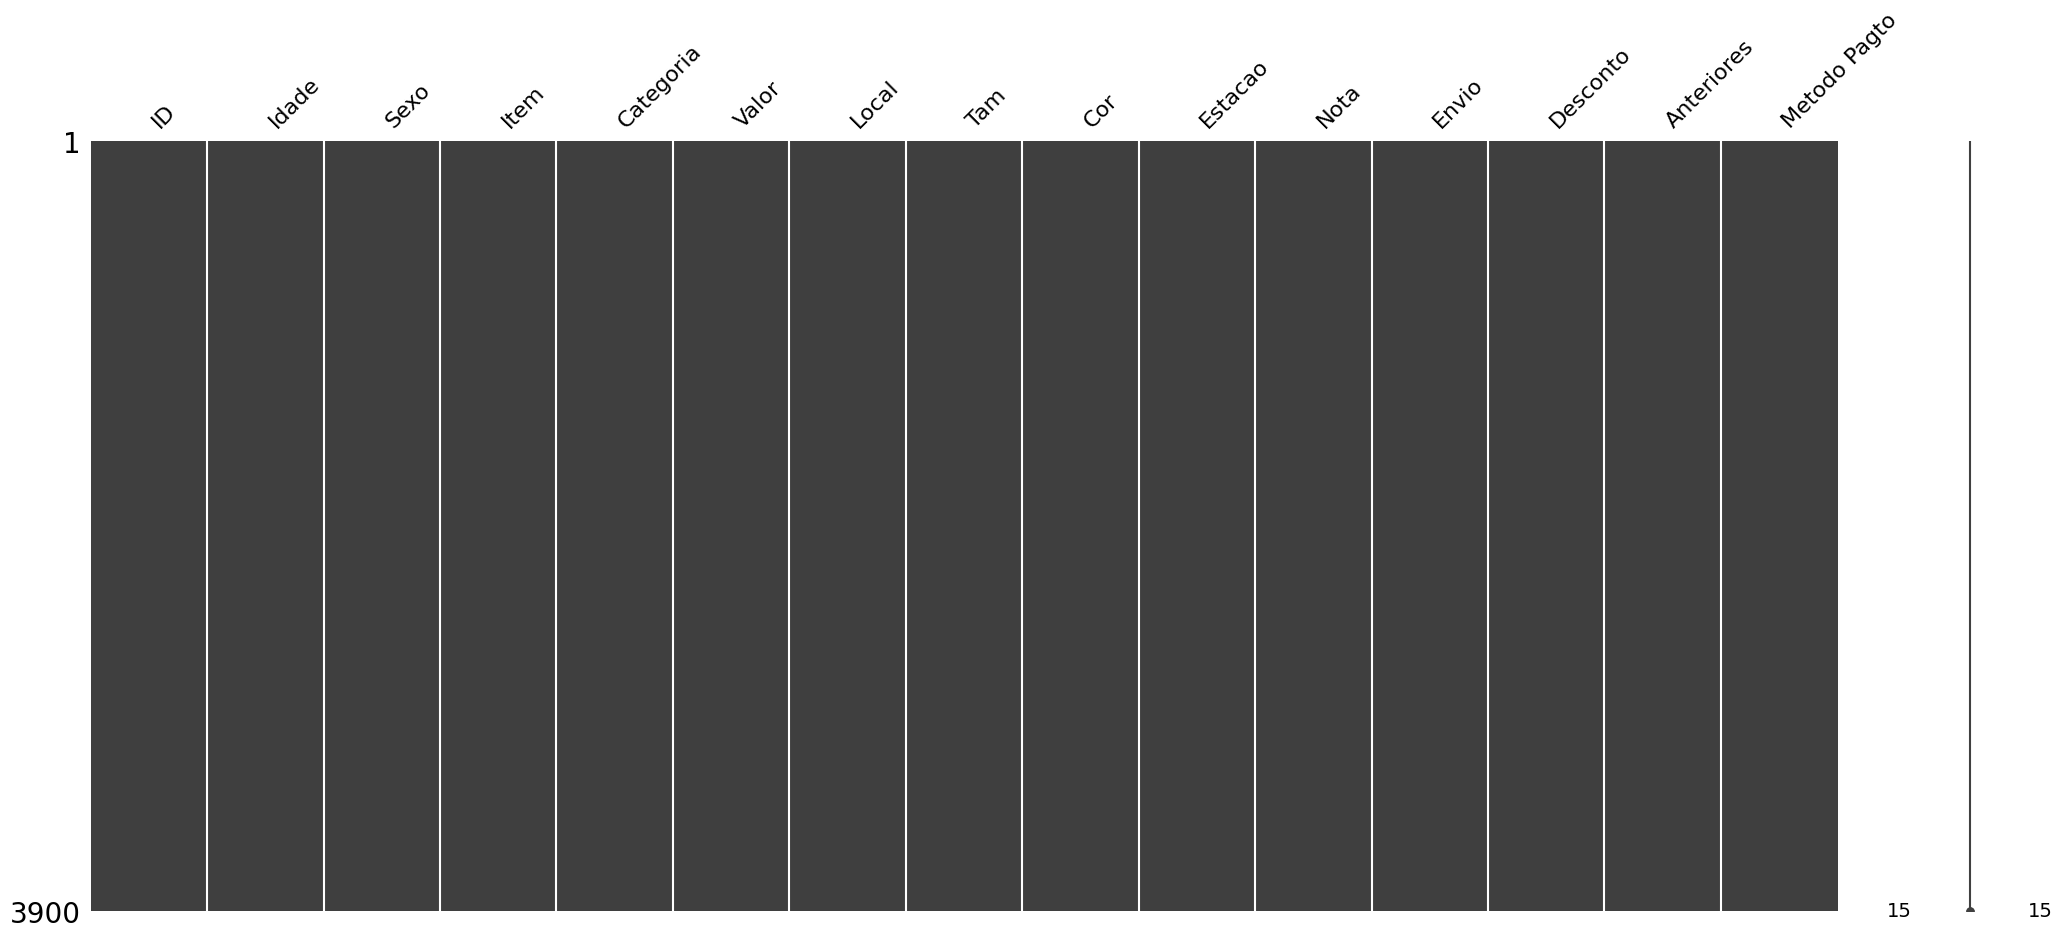

In [105]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [100]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url_dados = "https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVV_1/main/shopping_trends2.csv"

# Informa o cabeçalho das colunas
colunas1 = ['Customer ID','Age','Gender','Item Purchased','Category','Purchase Amount (USD)','Location','Size','Color','Season','Review Rating','Subscription Status','Shipping Type','Discount Applied','Promo Code Used','Previous Purchases','Payment Method','Frequency of Purchase']
colunas2 = ['ID','Idade','Sexo','Item','Categoria','Valor','Local','Tam','Cor','Estacao','Nota','Fidelidade','Envio','Desconto','Promo','Anteriores','Metodo Pagto','Freq compras']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url_dados, names=colunas2, skiprows=1, delimiter=',')

Primeira visualização do cabeçalho do dataset.

In [108]:
dataset.head()


,ID,Idade,Sexo,Item,Categoria,Valor,Local,Tam,Cor,Estacao,Nota,Fidelidade,Envio,Desconto,Promo,Anteriores,Metodo Pagto,Freq compras
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,31,Yes,Express,Yes,Yes,14,Credit Card,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,31,Yes,Express,Yes,Yes,2,Bank Transfer,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,31,Yes,Free Shipping,Yes,Yes,23,Cash,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,35,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,27,Yes,Free Shipping,Yes,Yes,31,Cash,Annually


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações, distribuição e alguns exemplos de linhas.

In [53]:
# Mostra as dimensões do dataset
print(dataset.shape)

(3900, 18)


Podemos verificar que o dataset tem 3900 linhas (entradas) de 18 colunas.

In [54]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            3900 non-null   int64 
 1   Idade         3900 non-null   int64 
 2   Sexo          3900 non-null   object
 3   Item          3900 non-null   object
 4   Categoria     3900 non-null   object
 5   Valor         3900 non-null   int64 
 6   Local         3900 non-null   object
 7   Tam           3900 non-null   object
 8   Cor           3900 non-null   object
 9   Estacao       3900 non-null   object
 10  Nota          3900 non-null   int64 
 11  Fidelidade    3900 non-null   object
 12  Envio         3900 non-null   object
 13  Desconto      3900 non-null   object
 14  Promo         3900 non-null   object
 15  Anteriores    3900 non-null   int64 
 16  Metodo Pagto  3900 non-null   object
 17  Freq compras  3900 non-null   object
dtypes: int64(5), object(13)
memory usage: 548.6+ KB


Essas são as primeiras 10 linhas do dataset.


In [55]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,ID,Idade,Sexo,Item,Categoria,Valor,Local,Tam,Cor,Estacao,Nota,Fidelidade,Envio,Desconto,Promo,Anteriores,Metodo Pagto,Freq compras
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,31,Yes,Express,Yes,Yes,14,Credit Card,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,31,Yes,Express,Yes,Yes,2,Bank Transfer,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,31,Yes,Free Shipping,Yes,Yes,23,Cash,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,35,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,27,Yes,Free Shipping,Yes,Yes,31,Cash,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,29,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,32,Yes,Free Shipping,Yes,Yes,49,Debit Card,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,32,Yes,Free Shipping,Yes,Yes,19,Debit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,26,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,48,Yes,2-Day Shipping,Yes,Yes,4,PayPal,Quarterly


Essas são as 10 últimas linhas do dataset.

In [56]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,ID,Idade,Sexo,Item,Categoria,Valor,Local,Tam,Cor,Estacao,Nota,Fidelidade,Envio,Desconto,Promo,Anteriores,Metodo Pagto,Freq compras
3890,3891,35,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,26,No,Standard,No,No,33,Credit Card,Annually
3891,3892,36,Female,Dress,Clothing,30,Colorado,L,Peach,Winter,47,No,Free Shipping,No,No,6,Cash,Quarterly
3892,3893,35,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,35,No,Standard,No,No,5,Bank Transfer,Fortnightly
3893,3894,21,Female,Hat,Accessories,64,Massachusetts,L,White,Fall,33,No,Store Pickup,No,No,29,Bank Transfer,Bi-Weekly
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,39,No,2-Day Shipping,No,No,44,Cash,Every 3 Months
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,42,No,2-Day Shipping,No,No,32,Cash,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,45,No,Store Pickup,No,No,41,PayPal,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,29,No,Standard,No,No,24,Credit Card,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,38,No,Express,No,No,24,PayPal,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,31,No,Store Pickup,No,No,33,Bank Transfer,Quarterly


Verificaremos os tipos dos atributos das 18 colunas do dataset e analizaremos possíveis conversões.

In [57]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

ID               int64
Idade            int64
Sexo            object
Item            object
Categoria       object
Valor            int64
Local           object
Tam             object
Cor             object
Estacao         object
Nota             int64
Fidelidade      object
Envio           object
Desconto        object
Promo           object
Anteriores       int64
Metodo Pagto    object
Freq compras    object
dtype: object

Realizaremos um resumo estatístico do dataset:

In [58]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,ID,Idade,Valor,Nota,Anteriores
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,37.499487,25.351538
std,1125.977353,15.207589,23.685392,7.162228,14.447125
min,1.000000,18.000000,20.000000,25.000000,1.000000
25%,975.750000,31.000000,39.000000,31.000000,13.000000
50%,1950.500000,44.000000,60.000000,37.000000,25.000000
75%,2925.250000,57.000000,81.000000,44.000000,38.000000
max,3900.000000,70.000000,100.000000,50.000000,50.000000


Agora vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento, se necessário.

Veremos que as classes 0 (não ocorrência de diabetes) e 1 (ocorrência de diabetes) estão desbalanceadas. Vamos guardar esta informação, pois possivelmente precisaremos realizar algum tipo de tratamento nas próximas etapas.

In [59]:
# distribuição das classes
print(dataset.groupby('ID').size())

ID
1       1
2       1
3       1
4       1
5       1
       ..
3896    1
3897    1
3898    1
3899    1
3900    1
Length: 3900, dtype: int64


Gráfico scatter plot cruzando as variáveis "Idade" vs "Vendas Anteriores" para ver se tem alguma relação entre elas.

Text(0, 0.5, 'Vendas Prévias')

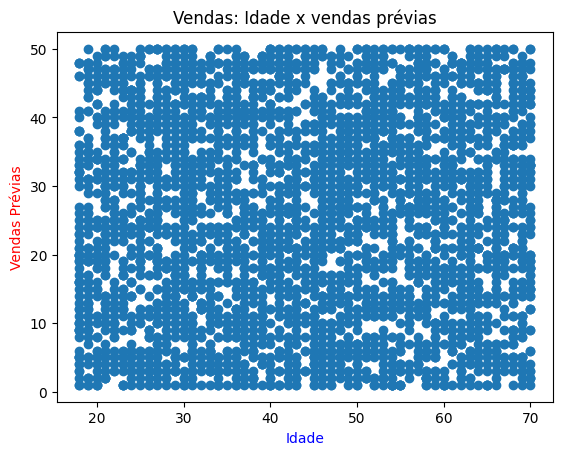

In [60]:
# plotando gráfico de idade x vendas prévias
plt.scatter(dataset['Idade'], dataset['Anteriores'])

#incluindo titulo do gráfico e rótulos dos eixos
plt.title('Vendas: Idade x vendas prévias')
plt.xlabel('Idade', color='blue')
plt.ylabel('Vendas Prévias', color='red')


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

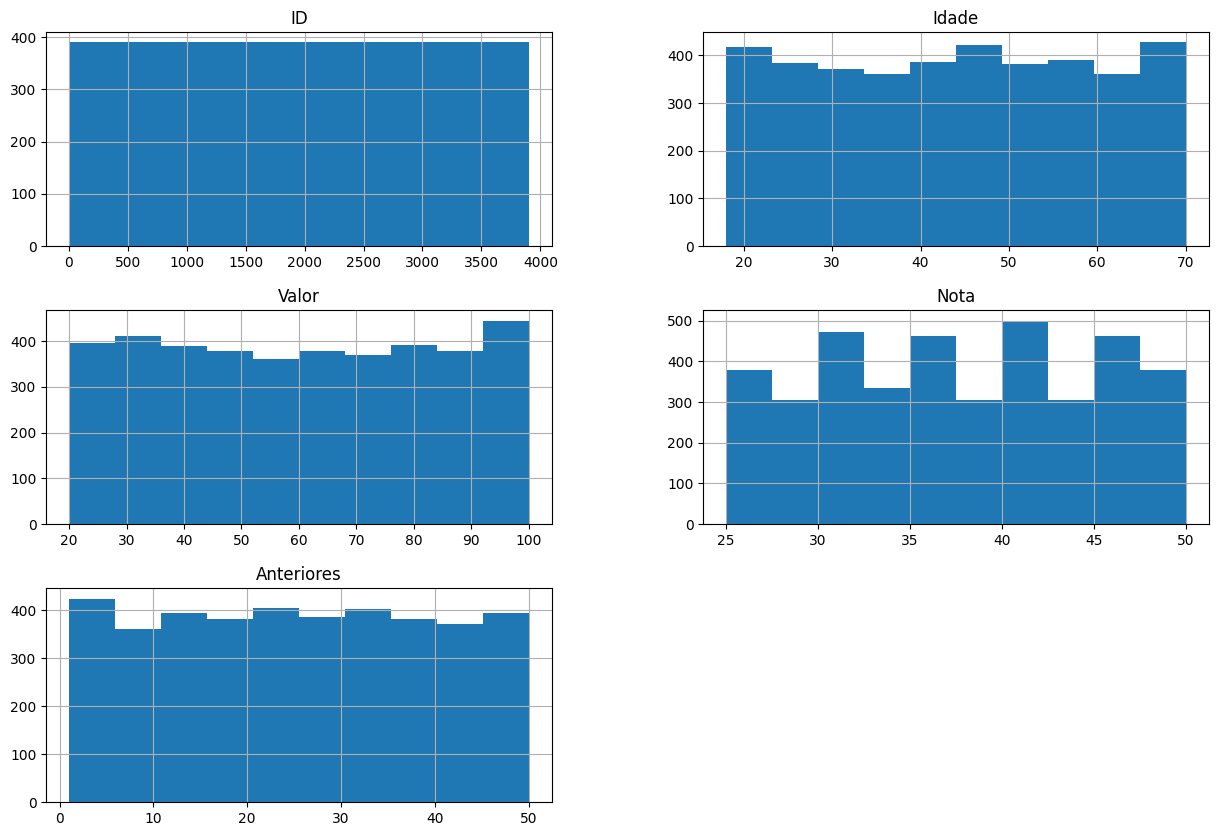

In [61]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

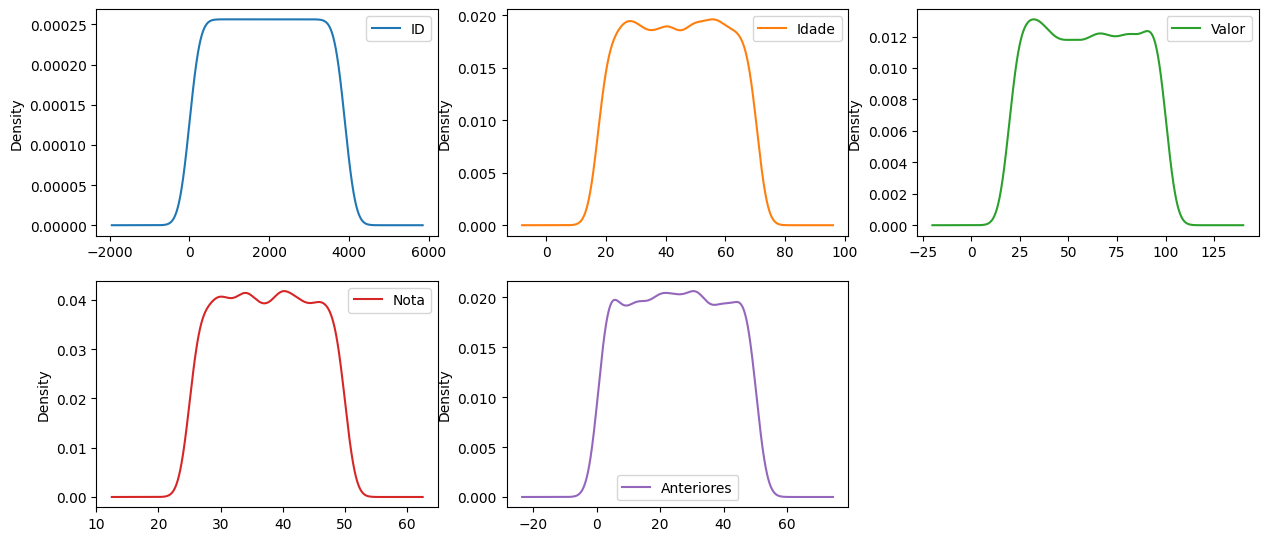

In [62]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Vamos agora trabalhar com boxplots. No **boxblot**, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

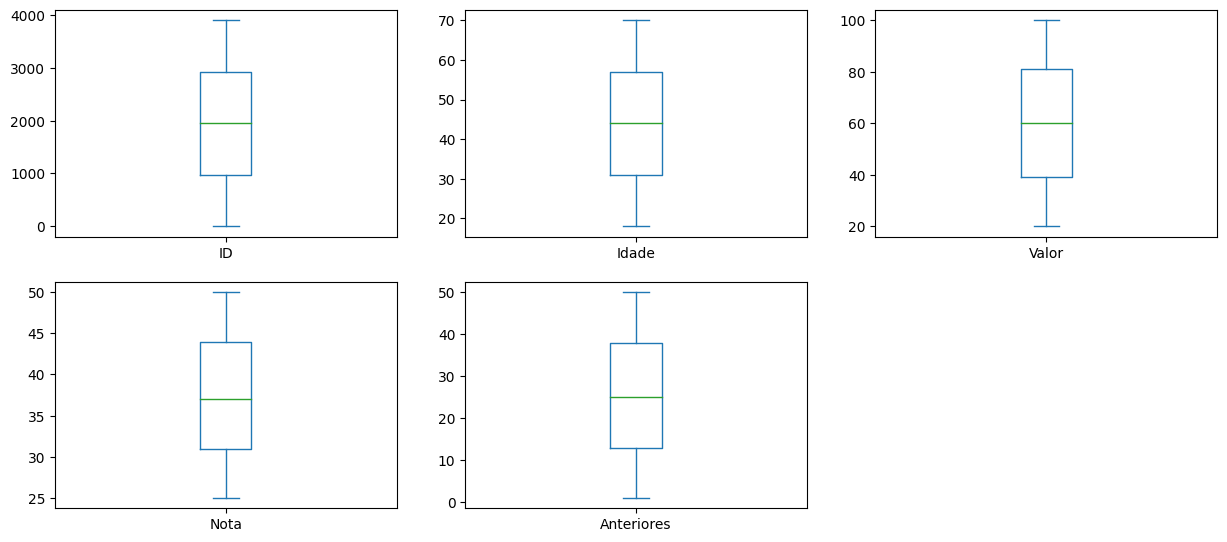

In [63]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A **covariância** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis,
* Próximo de +1: há uma correlação positiva entre as variáveis.
* 0: não há correlação entre as variáveis.

<i>OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.</i>

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A **matriz de correlação** exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

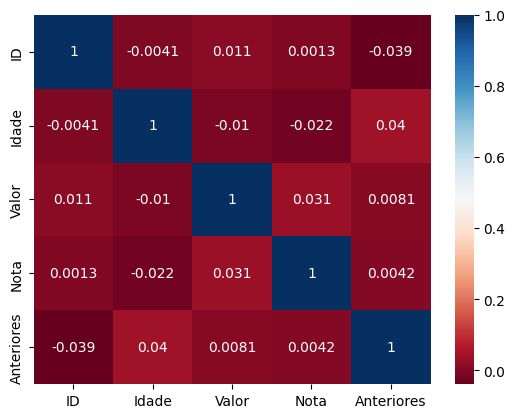

In [64]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

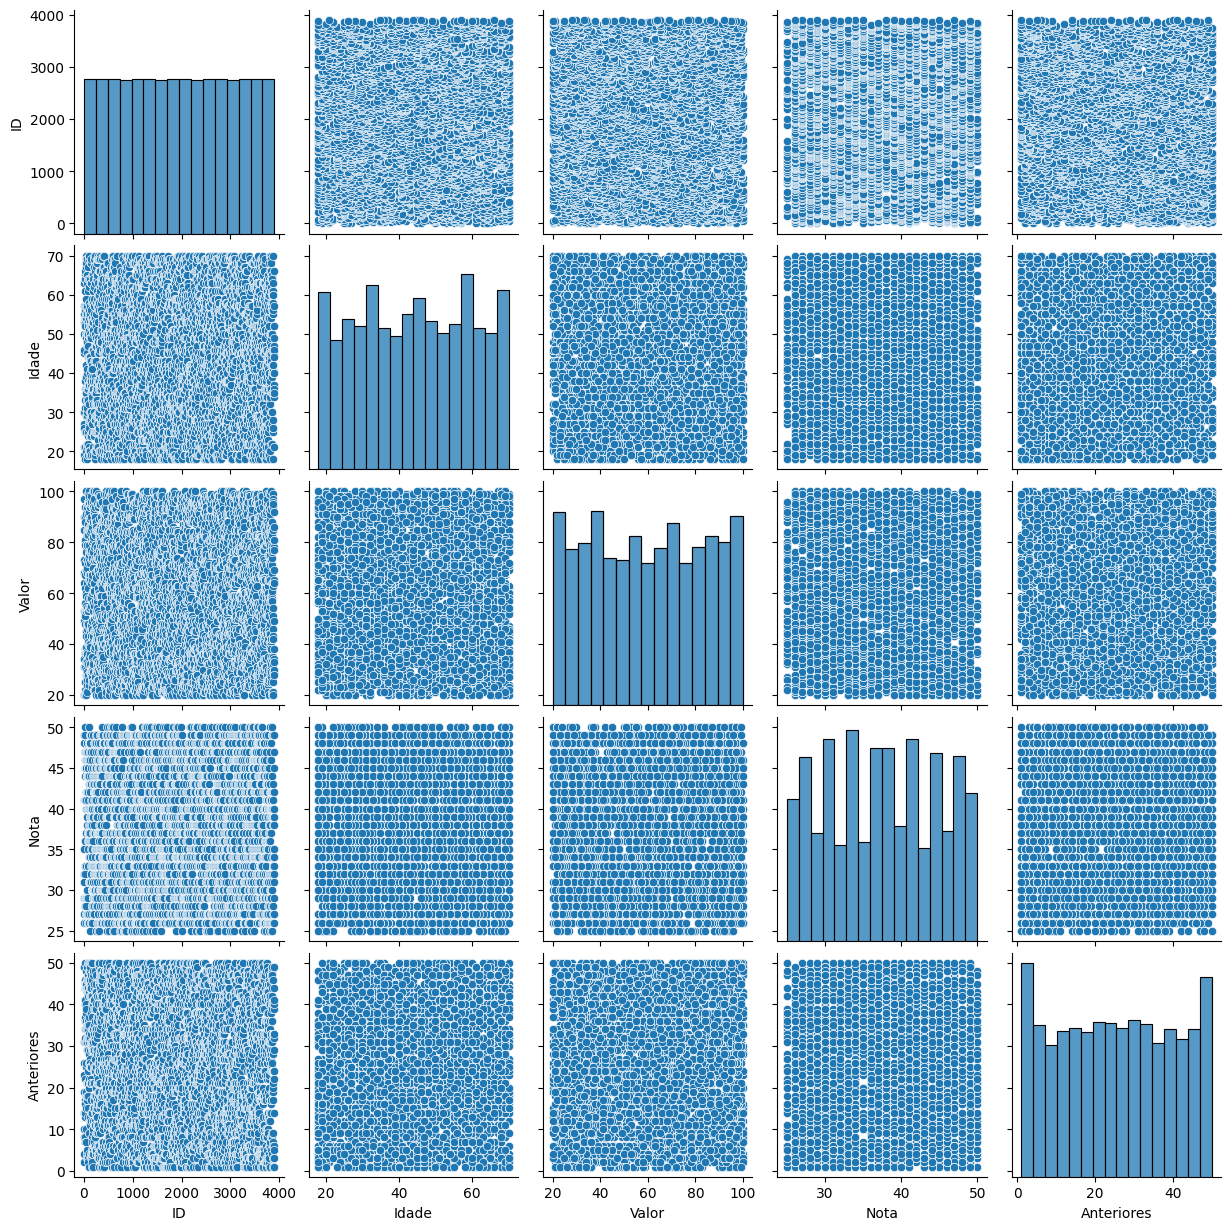

In [65]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

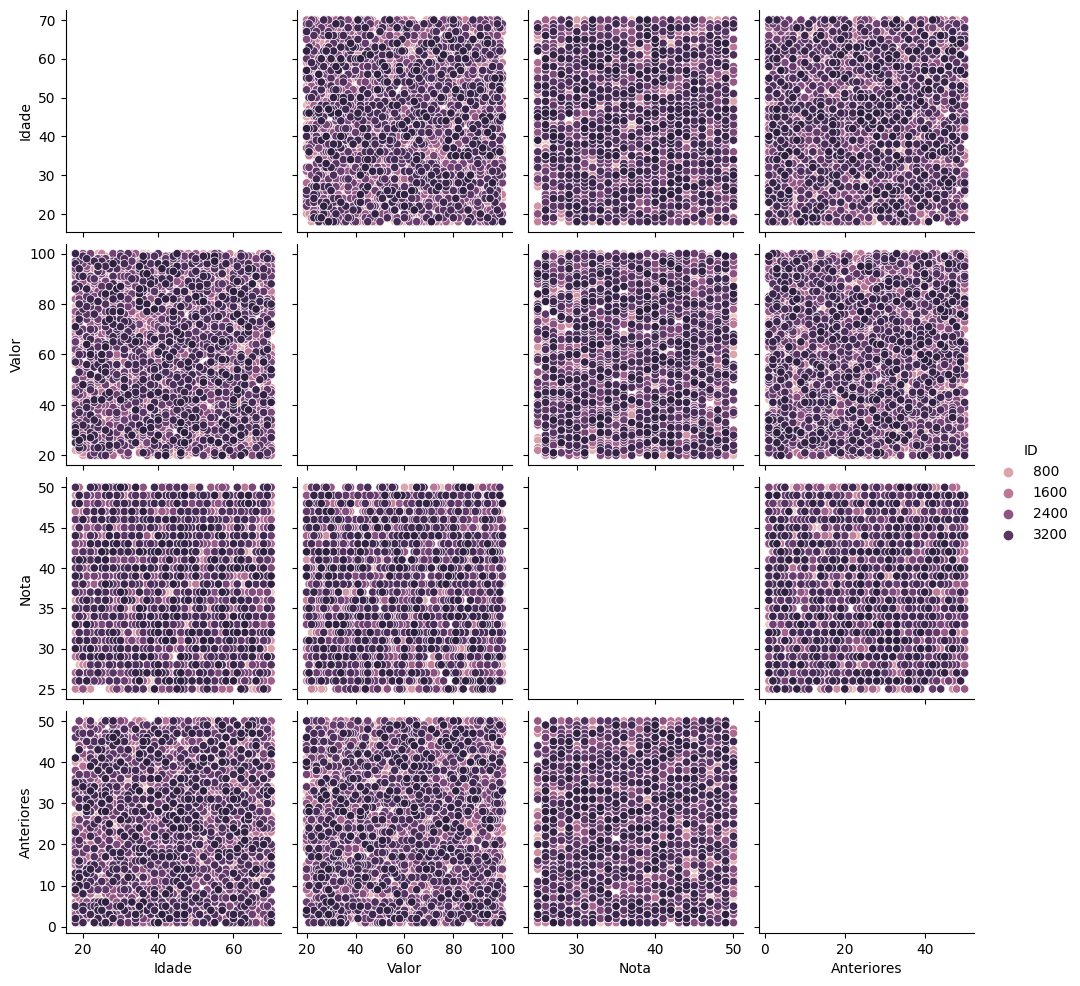

In [66]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset, hue = "ID", height = 2.5);

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

Sabemos que o datset Diabetes não tem missings aparentes, mas valores "0" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [81]:
# verificando nulls no dataset
dataset.isnull().sum()

ID              0
Idade           0
Sexo            0
Item            0
Categoria       0
Valor           0
Local           0
Tam             0
Cor             0
Estacao         0
Nota            0
Fidelidade      0
Envio           0
Desconto        0
Promo           0
Anteriores      0
Metodo Pagto    0
Freq compras    0
dtype: int64

Não existe missing (campos null) no dataset.

Retirando a última coluna do dataset.

<Axes: >

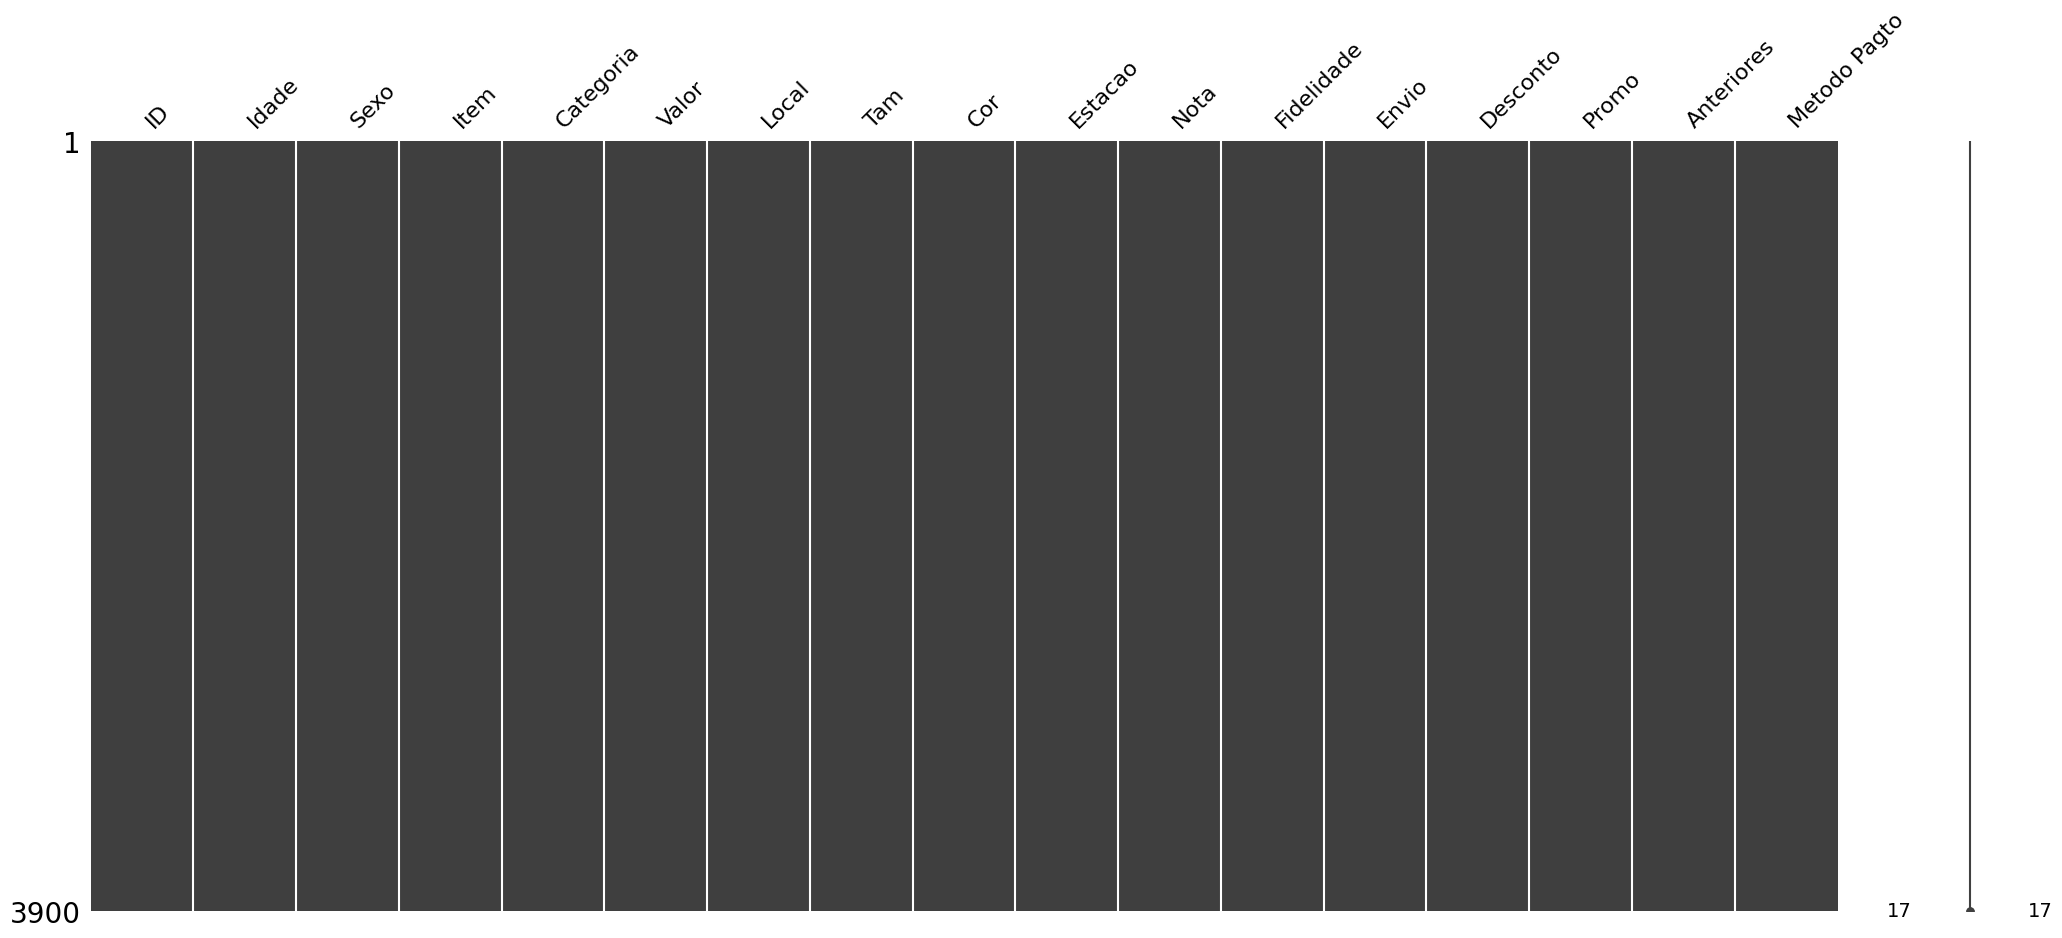

In [113]:
# salvando um NOVO dataset para tratamento de missings, com cuidado para não sobrescrever o dataset original

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (Freq compras)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Removendo as colunas 'Fidelidade' e 'Promo'.

<Axes: >

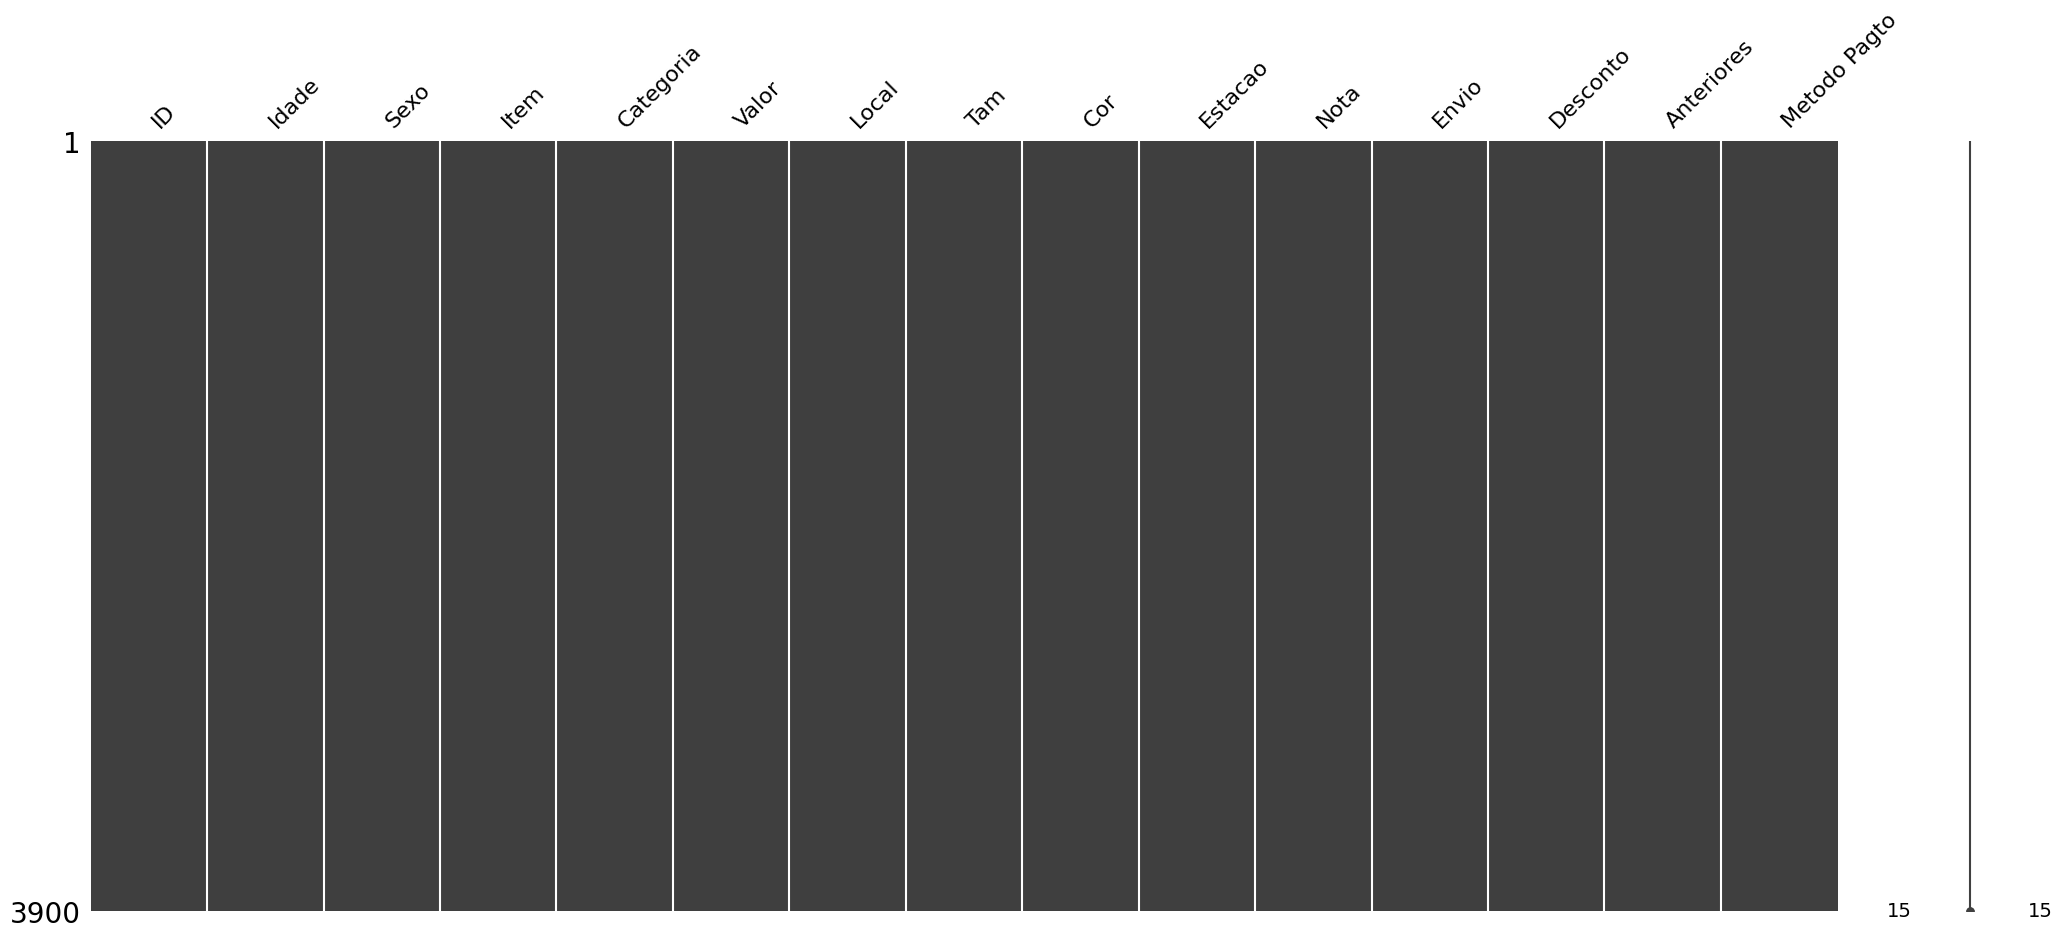

In [112]:
# removendo as colunas 'Fidelidade' e 'Promo'
atributos.drop(['Fidelidade', 'Promo'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [115]:
# substituindo os NaN de 'preg' por 0
#atributos['preg'].fillna(0, inplace=True)

# substituindo os NaN de 'plas', 'pres'e 'mass' pela mediana da coluna
#atributos['plas'].fillna(atributos['plas'].median(), inplace=True)
#atributos['pres'].fillna(atributos['pres'].median(), inplace=True)
#atributos['mass'].fillna(atributos['mass'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
#ms.matrix(atributos)

Salvando o dataset antigo e mostrando as primeiras linhas do dataset após a limpeza.

In [70]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['ID'] = dataset['ID']

# exibindo as primeiras linhas
datasetSemMissings.head()

,ID,Idade,Sexo,Item,Categoria,Valor,Local,Tam,Cor,Estacao,Nota,Envio,Desconto,Anteriores,Metodo Pagto
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,31,Express,Yes,14,Credit Card
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,31,Express,Yes,2,Bank Transfer
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,31,Free Shipping,Yes,23,Cash
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,35,Next Day Air,Yes,49,PayPal
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,27,Free Shipping,Yes,31,Cash


### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


In [94]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [95]:
# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:6]
y_sm = array[:,6]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

## Conclusão

Neste MVP foi possível verificar que... [escreva aqui os seu principais achados, pontos de atenção, etc.]